<a href="https://colab.research.google.com/github/BeltranMal/TA047R-2C2024-GRUPO01/blob/main/TA047R_TP1_GRUPO01_ENTREGA_EJ4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Librerías para manejo de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import random
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import scale, MinMaxScaler
from yellowbrick.cluster import SilhouetteVisualizer

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Archivo

In [2]:
music = pd.read_csv('/content/drive/MyDrive/TA047R-2C2024-GRUPO01/playlist_spotify.csv')

In [3]:
# Analizamos duplicados
music.duplicated().sum()

14

In [4]:
music.drop_duplicates(inplace=True)

In [5]:
# Analizamos existencia de nulos
music.isna().sum().sum()

0

In [6]:
# Vemos dimensiones
music.shape

(736, 13)

In [7]:
music.head()

,acousticness,danceability,duration,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.713,0.514,100125,0.521,0.816000,8,0.1120,-14.835,0,0.0444,119.879,4,0.143
1,0.192,0.714,207019,0.614,0.000000,4,0.2630,-6.935,1,0.0319,123.969,4,0.582
2,0.333,0.630,216200,0.455,0.000004,5,0.1270,-9.290,1,0.0292,139.931,4,0.199
3,0.601,0.810,136413,0.221,0.210000,5,0.1840,-11.005,1,0.0429,109.960,4,0.798
4,0.883,0.465,181440,0.459,0.000173,6,0.0692,-8.137,0,0.0351,90.807,4,0.288


# Analizar la tendencia al clustering del dataset. (Hopkins)

In [8]:
def Hopkins(datos):
    cant_filas = datos.shape[0]
    cant_columnas = datos.shape[1]

    sample_size = int(0.2 * cant_filas)

    nbrs = NearestNeighbors(n_neighbors=1, algorithm='brute').fit(datos)
    random_indices = random.sample(range(cant_filas), sample_size)

    x_distancias = []
    y_distancias = []
    cant_vecinos = 2
    for i in range(sample_size):

        x_dist, _ = nbrs.kneighbors(np.random.normal(size=(1, cant_columnas)).reshape(1, -1), cant_vecinos, return_distance=True)

        x_distancias.append(x_dist[0][1])

        y_dist, _ = nbrs.kneighbors(datos.iloc[random_indices[i]].values.reshape(1, -1), cant_vecinos, return_distance=True)

        y_distancias.append(y_dist[0][1])

    hopkins = sum(x_distancias) / (sum(x_distancias) + sum(y_distancias))
    return hopkins

In [9]:
for i in range(10):
  print(f"Pasada numero: {i+1}, se obtuvo {Hopkins(music)}")

Pasada numero: 1, se obtuvo 0.9953345732575802
Pasada numero: 2, se obtuvo 0.9876666000953411
Pasada numero: 3, se obtuvo 0.9798407385487501
Pasada numero: 4, se obtuvo 0.9915869432418949
Pasada numero: 5, se obtuvo 0.992556402344304
Pasada numero: 6, se obtuvo 0.9830673708175771
Pasada numero: 7, se obtuvo 0.9848483184899682
Pasada numero: 8, se obtuvo 0.9934104825096203
Pasada numero: 9, se obtuvo 0.9938516494786735
Pasada numero: 10, se obtuvo 0.9794776085005208


# Estimar la cantidad apropiada de grupos que se deben formar.

In [10]:
def mostrar_estimacion_error(datos):
  errores = []

  for k_clusters in range(1,16):
      km = KMeans(n_clusters=k_clusters)
      km.fit(datos)
      errores.append(km.inertia_)

  plt.plot(range(1,16), errores,"-o")
  plt.xlabel("Cantidad de clusters")
  plt.ylabel("Error")
  plt.grid(True)
  plt.show()

In [11]:
def obtener_coef_silhoutte(datos):
  list_k = list(range(2, 7))

  for n_clusters in list_k:
      clusterer = KMeans(n_clusters=n_clusters)
      preds = clusterer.fit_predict(datos)

      score = silhouette_score(datos, preds)
      print ("For n_clusters = " + str(n_clusters) + " silhouette score is " + str(score))

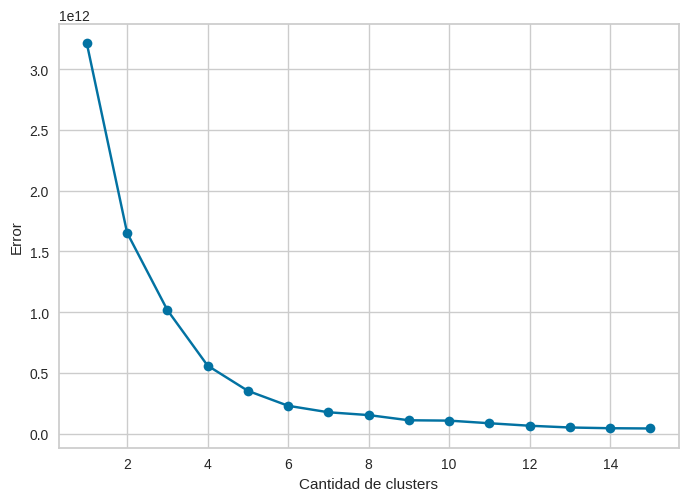

In [12]:
mostrar_estimacion_error(music)

In [13]:
obtener_coef_silhoutte(music)

For n_clusters = 2 silhouette score is 0.5692260767404769
For n_clusters = 3 silhouette score is 0.508342718358921
For n_clusters = 4 silhouette score is 0.5429290236660737
For n_clusters = 5 silhouette score is 0.5136451702953135
For n_clusters = 6 silhouette score is 0.5200732935060439


# Evaluar la calidad de los grupos formados realizando un análisis de Silhouette.

In [14]:
def graficar_silhoutte(datos, k):
  modelo = KMeans(k, random_state=0)
  visualizador = SilhouetteVisualizer(modelo, colors='yellowbrick')
  visualizador.fit(datos)
  visualizador.show()
  print("\n")

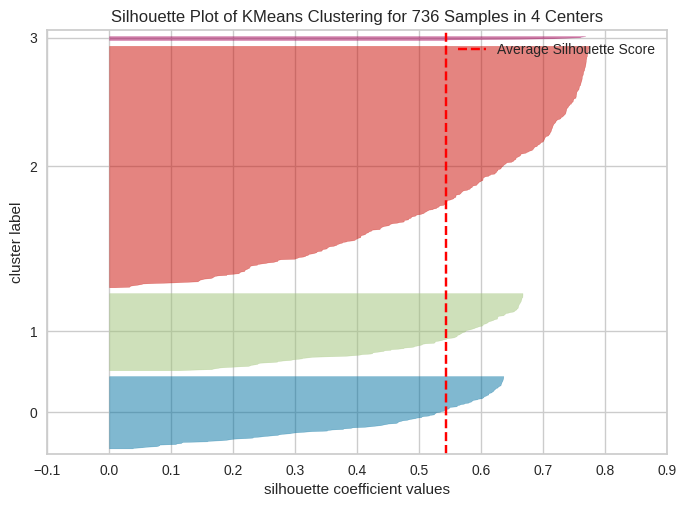

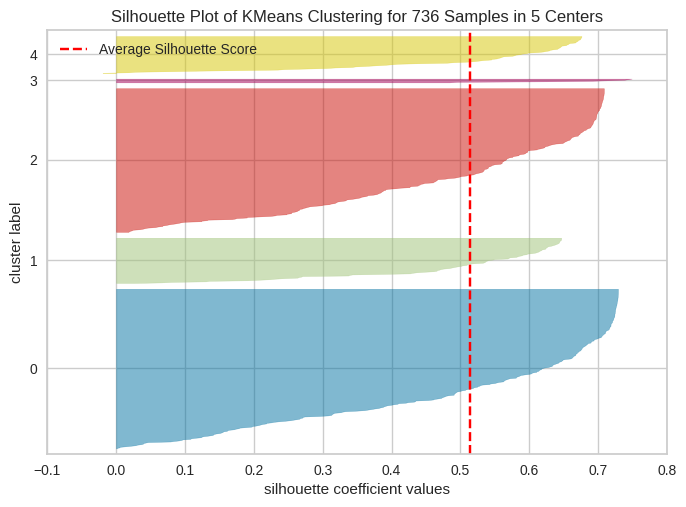

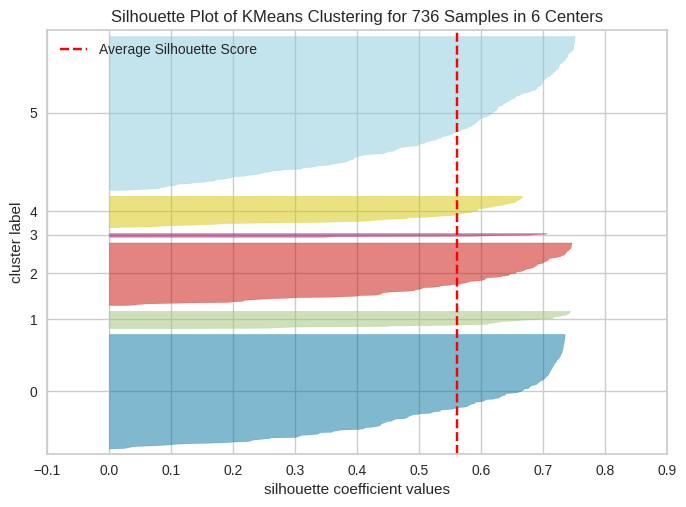

In [15]:
graficar_silhoutte(music,4)
graficar_silhoutte(music,5)
graficar_silhoutte(music,6)

# Realizamos un analisis para comprender en función de qué características fueron formados cada cluster.

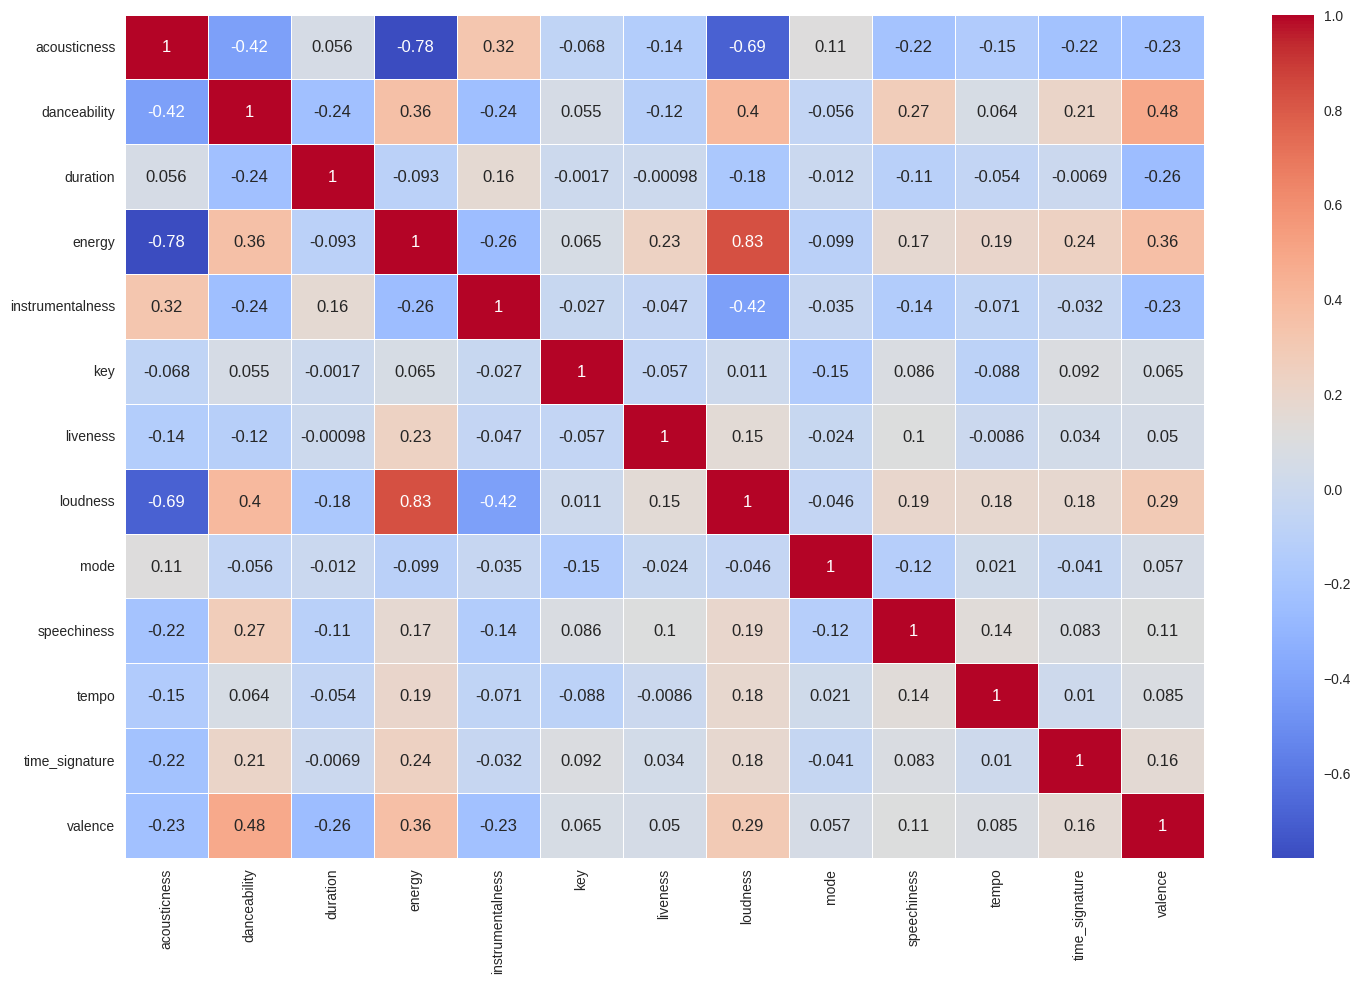

In [17]:
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(data = music.corr(), annot = True, cmap = "coolwarm", linewidths = 0.5, ax=ax)
fig.tight_layout()

<Axes: >

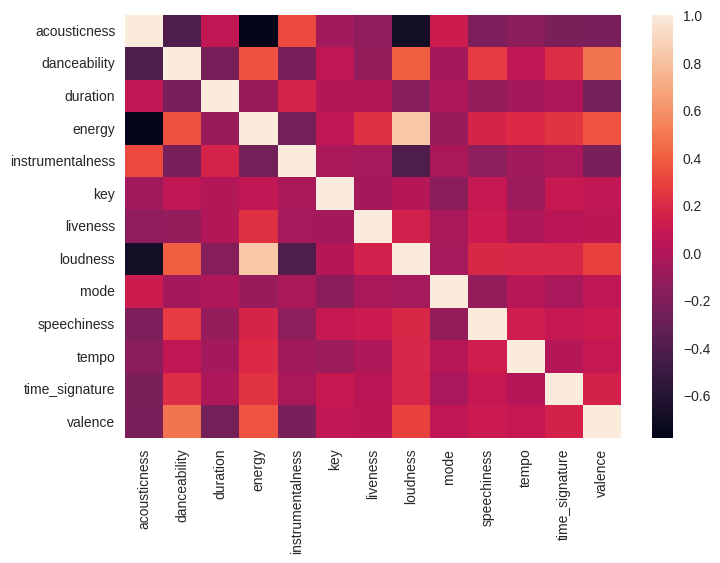

In [18]:
m_correlacion = music.corr()
sns.heatmap(m_correlacion)

In [19]:
kmeans = KMeans(n_clusters=4, random_state=42)
music['cluster'] = kmeans.fit_predict(music)

In [20]:
medidas_resumen = music.groupby("cluster").agg(["mean", "std", "median", "min", "max", "count"])
medidas_resumen

acousticness                                         danceability  \
                mean       std median       min    max count         mean   
cluster                                                                     
0           0.314242  0.322680  0.176  0.000001  0.994   449     0.611621   
1           0.412844  0.347418  0.360  0.000003  0.994   135     0.627570   
2           0.744700  0.334288  0.902  0.094600  0.990     8     0.409625   
3           0.420292  0.347445  0.370  0.000003  0.990   144     0.529153   

                                  ... time_signature                 valence  \
              std  median    min  ...         median min max count      mean   
cluster                           ...                                          
0        0.160785  0.6120  0.157  ...            4.0   1   5   449  0.516994   
1        0.165488  0.6380  0.181  ...            4.0   1   5   135  0.551110   
2        0.216330  0.4060  0.135  ...            4.0   3   4     8  0.218188   
3        0.188961  0.5385  0.107  ...            4.0   1   5   144  0.404240   

                                                
              std  median     min    max count  
cluster                                         
0        0.231417  0.5060  0.0360  0.975   449  
1        0.238971  0.5430  0.0357  0.966   135  
2        0.214408  0.1705  0.0388  0.672     8  
3        0.230580  0.3930  0.0332  0.964   144  

[4 rows x 78 columns]

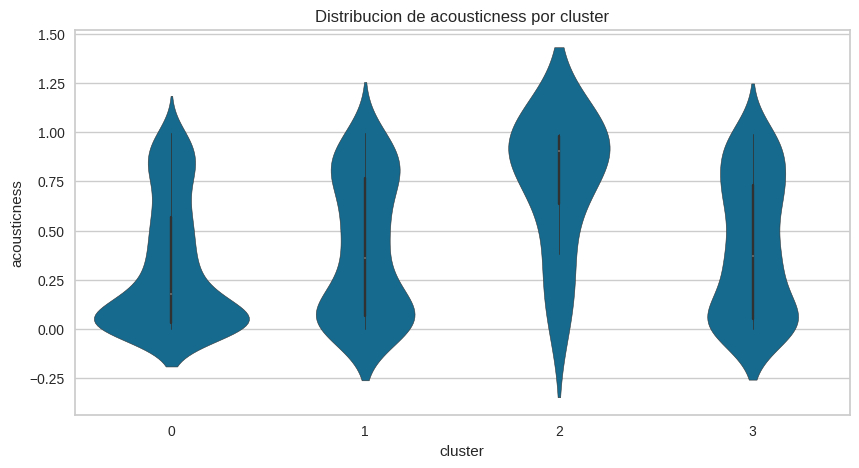

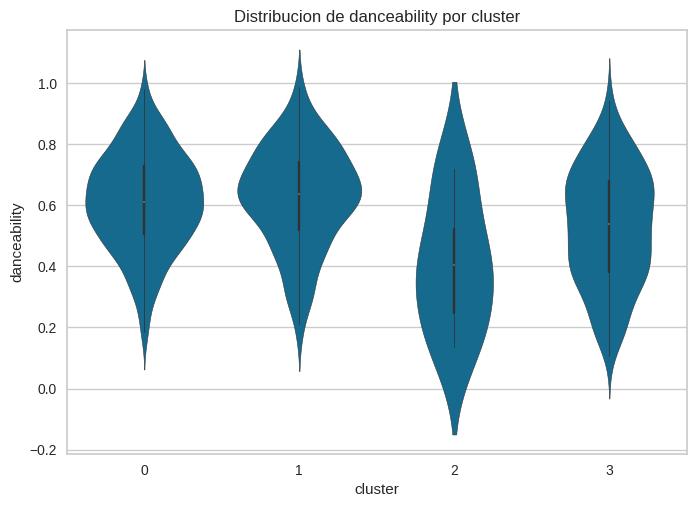

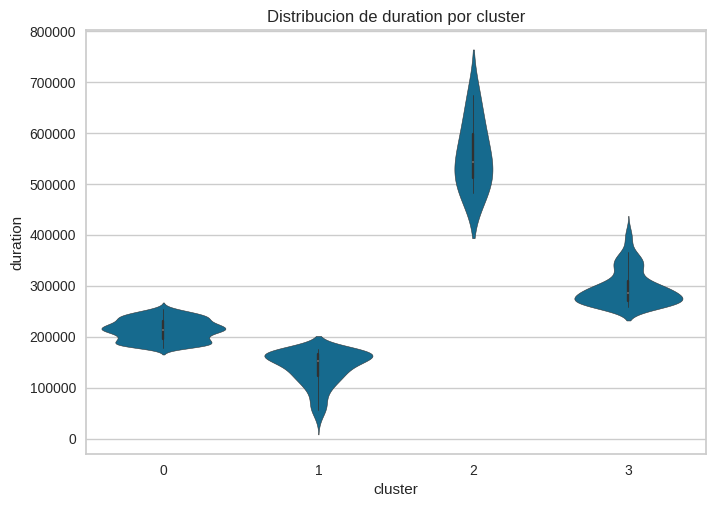

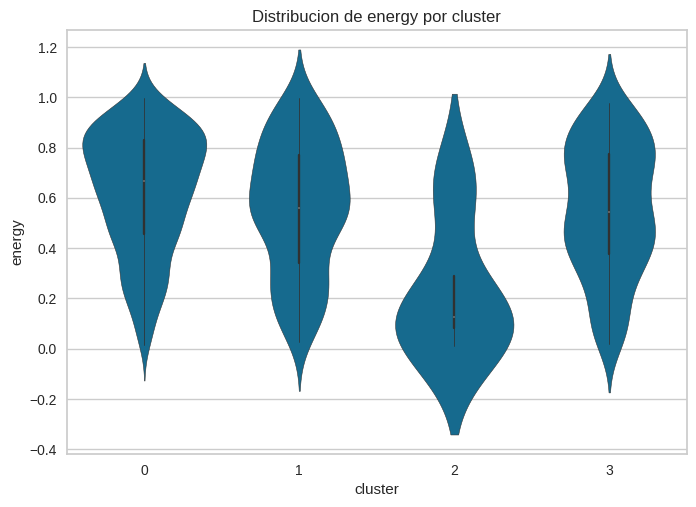

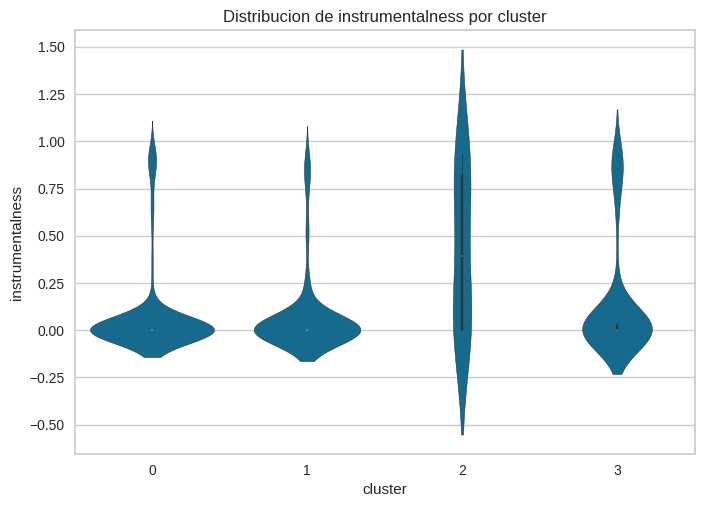

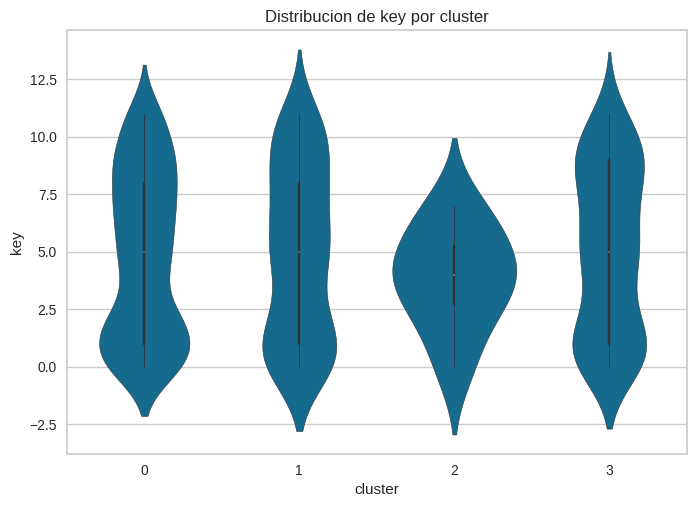

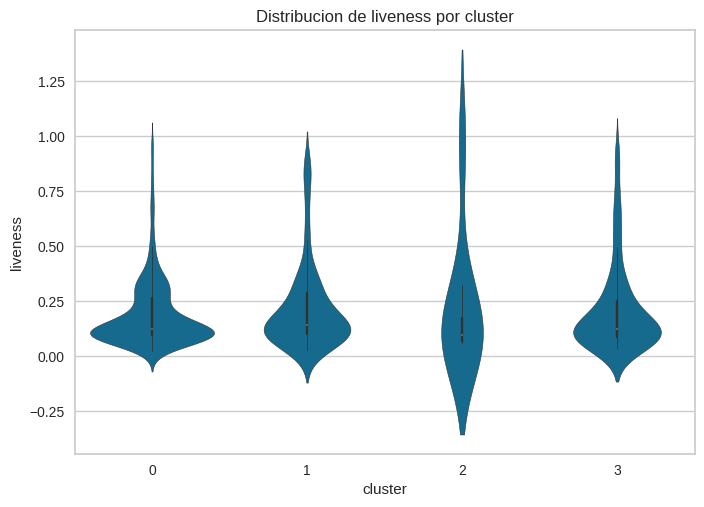

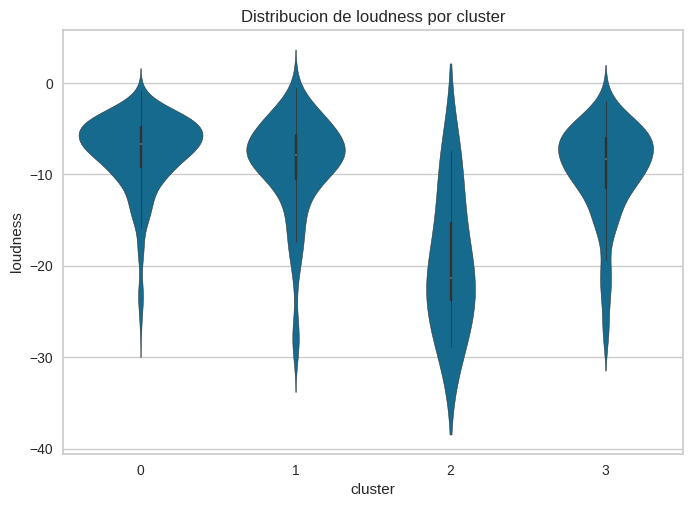

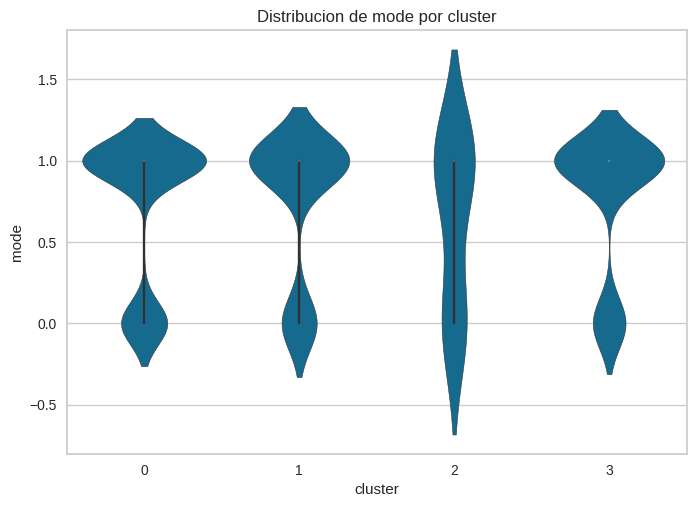

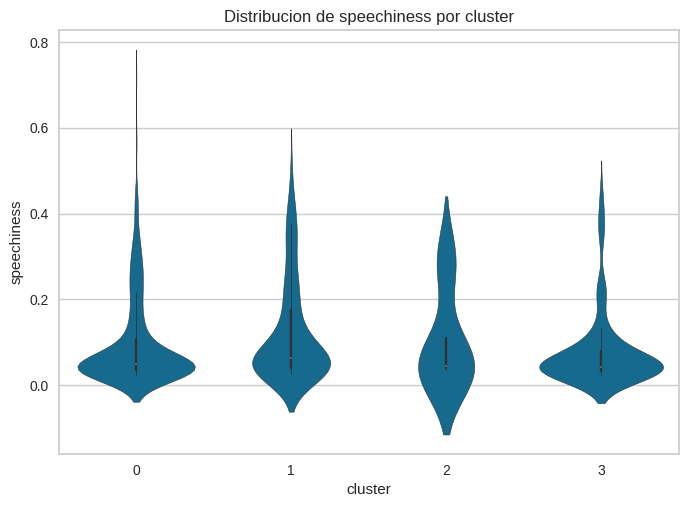

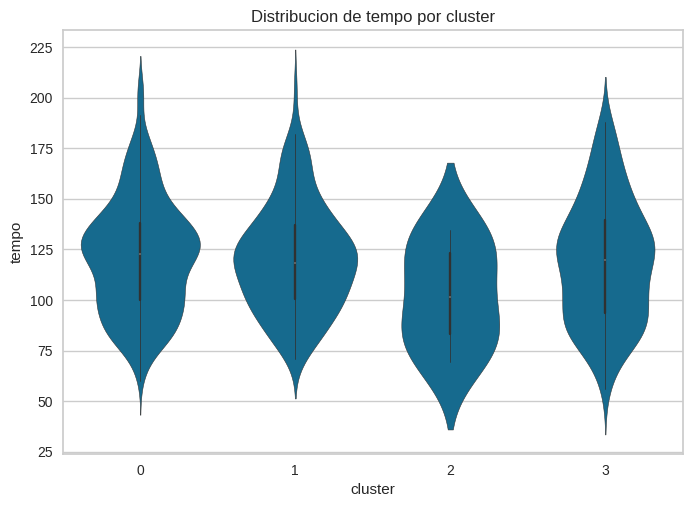

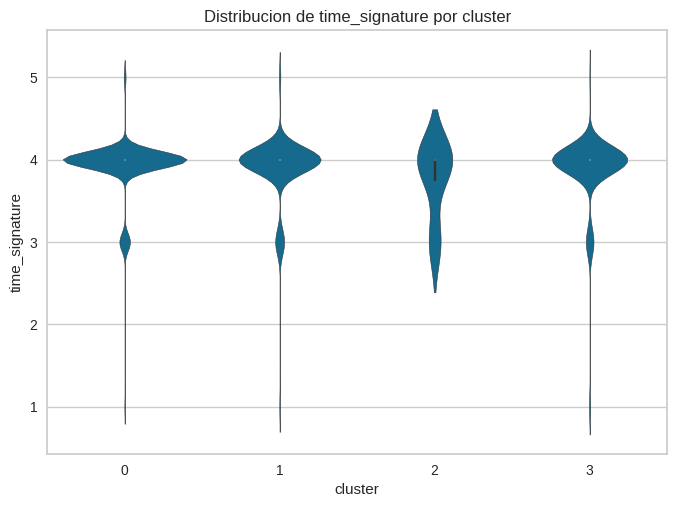

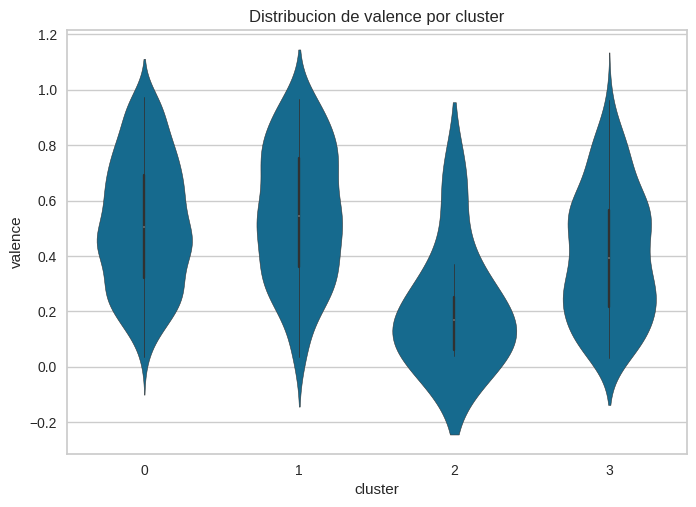

<Figure size 800x550 with 0 Axes>

In [21]:
featuress = music.drop(columns=["cluster"])
plt.figure(figsize=(10, 5))


for columna in featuress:
    sns.violinplot(x='cluster', y=columna, data=music)
    plt.title(f"Distribucion de {columna} por cluster")
    plt.show()
    print("\n")

plt.tight_layout()
plt.show()


In [22]:
clusteres = medidas_resumen.stack()
cluster0 = clusteres.iloc[0:6]
cluster1 = clusteres.iloc[6:12]
cluster2 = clusteres.iloc[12:18]
cluster3 = clusteres.iloc[18:24]

In [23]:
cluster0

acousticness  danceability       duration      energy  \
cluster                                                                 
0       mean        0.314242      0.611621  213933.672606    0.625389   
        std         0.322680      0.160785   20750.290291    0.239976   
        median      0.176000      0.612000  214133.000000    0.667000   
        min         0.000001      0.157000  177333.000000    0.015300   
        max         0.994000      0.981000  255000.000000    0.995000   
        count     449.000000    449.000000     449.000000  449.000000   

                instrumentalness         key    liveness    loudness  \
cluster                                                                
0       mean            0.083739    4.815145    0.193771   -7.677183   
        std             0.241500    3.628895    0.158742    4.294142   
        median          0.000006    5.000000    0.125000   -6.699000   
        min             0.000000    0.000000    0.024000  -27.456000   
        max             0.967000   11.000000    0.970000   -0.913000   
        count         449.000000  449.000000  449.000000  449.000000   

                      mode  speechiness       tempo  time_signature  \
cluster                                                               
0       mean      0.728285     0.097950  121.576808        3.922049   
        std       0.445340     0.104765   28.270041        0.354410   
        median    1.000000     0.048800  122.491000        4.000000   
        min       0.000000     0.023400   59.896000        1.000000   
        max       1.000000     0.721000  203.988000        5.000000   
        count   449.000000   449.000000  449.000000      449.000000   

                   valence  
cluster                     
0       mean      0.516994  
        std       0.231417  
        median    0.506000  
        min       0.036000  
        max       0.975000  
        count   449.000000

In [24]:
cluster1

acousticness  danceability       duration      energy  \
cluster                                                                 
1       mean        0.412844      0.627570  139115.303704    0.560223   
        std         0.347418      0.165488   34449.511920    0.259847   
        median      0.360000      0.638000  151523.000000    0.560000   
        min         0.000003      0.181000   33840.000000    0.027600   
        max         0.994000      0.986000  175667.000000    0.995000   
        count     135.000000    135.000000     135.000000  135.000000   

                instrumentalness         key    liveness    loudness  \
cluster                                                                
1       mean            0.077883    4.933333    0.222595   -9.178800   
        std             0.217687    3.730071    0.197010    5.588452   
        median          0.000002    5.000000    0.140000   -7.917000   
        min             0.000000    0.000000    0.027700  -29.601000   
        max             0.918000   11.000000    0.875000   -0.533000   
        count         135.000000  135.000000  135.000000  135.000000   

                      mode  speechiness       tempo  time_signature  \
cluster                                                               
1       mean      0.740741     0.122504  120.911059        3.896296   
        std       0.439860     0.117371   26.218390        0.410207   
        median    1.000000     0.062500  118.211000        4.000000   
        min       0.000000     0.026500   70.965000        1.000000   
        max       1.000000     0.511000  204.162000        5.000000   
        count   135.000000   135.000000  135.000000      135.000000   

                   valence  
cluster                     
1       mean      0.551110  
        std       0.238971  
        median    0.543000  
        min       0.035700  
        max       0.966000  
        count   135.000000

In [25]:
cluster2

acousticness  danceability      duration    energy  \
cluster                                                              
2       mean        0.744700      0.409625  557387.62500  0.232356   
        std         0.334288      0.216330   67284.76231  0.265177   
        median      0.902000      0.406000  543340.00000  0.126000   
        min         0.094600      0.135000  482333.00000  0.009250   
        max         0.990000      0.719000  675360.00000  0.664000   
        count       8.000000      8.000000       8.00000  8.000000   

                instrumentalness       key  liveness   loudness      mode  \
cluster                                                                     
2       mean            0.427001  3.875000  0.227412 -19.512875  0.625000   
        std             0.418239  2.232071  0.315639   7.276520  0.517549   
        median          0.393000  4.000000  0.098350 -21.359500  1.000000   
        min             0.000000  0.000000  0.060400 -28.841000  0.000000   
        max             0.934000  7.000000  0.979000  -7.471000  1.000000   
        count           8.000000  8.000000  8.000000   8.000000  8.000000   

                speechiness       tempo  time_signature   valence  
cluster                                                            
2       mean       0.104075  102.552000         3.75000  0.218188  
        std        0.113362   25.265739         0.46291  0.214408  
        median     0.045050  101.243500         4.00000  0.170500  
        min        0.034900   69.321000         3.00000  0.038800  
        max        0.291000  134.537000         4.00000  0.672000  
        count      8.000000    8.000000         8.00000  8.000000

In [26]:
cluster3

acousticness  danceability       duration      energy  \
cluster                                                                 
3       mean        0.420292      0.529153  296532.472222    0.553089   
        std         0.347445      0.188961   35038.215664    0.260987   
        median      0.370000      0.538500  285686.500000    0.544500   
        min         0.000003      0.107000  257840.000000    0.019800   
        max         0.990000      0.942000  411520.000000    0.979000   
        count     144.000000    144.000000     144.000000  144.000000   

                instrumentalness         key    liveness    loudness  \
cluster                                                                
3       mean            0.151491    5.041667    0.216340   -9.792903   
        std             0.313066    3.635249    0.205093    5.386134   
        median          0.000162    5.000000    0.122500   -8.351500   
        min             0.000000    0.000000    0.036500  -27.473000   
        max             0.937000   11.000000    0.931000   -2.024000   
        count         144.000000  144.000000  144.000000  144.000000   

                      mode  speechiness       tempo  time_signature    valence  
cluster                                                                         
3       mean      0.770833     0.079936  118.960403        3.875000    0.40424  
        std       0.421764     0.089125   30.050950        0.456116    0.23058  
        median    1.000000     0.042800  119.963500        4.000000    0.39300  
        min       0.000000     0.024300   55.747000        1.000000    0.03320  
        max       1.000000     0.458000  188.055000        5.000000    0.96400  
        count   144.000000   144.000000  144.000000      144.000000  144.00000

In [27]:
def informacion_cluster(cluster):
  for indice, fila in cluster.iterrows():
    print(f"Cluster: {indice[0]} con medida de resumen {indice[1]}")
    print("-" * 50)
    for columna in fila.index:

      print(f"Columna: {columna}, Valor: {fila[columna]}")

    print("\n")
    print("-" * 50)

In [28]:
informacion_cluster(cluster0)

Cluster: 0 con medida de resumen mean
--------------------------------------------------
Columna: acousticness, Valor: 0.31424199489977733
Columna: danceability, Valor: 0.6116213808463251
Columna: duration, Valor: 213933.67260579063
Columna: energy, Valor: 0.625388864142539
Columna: instrumentalness, Valor: 0.08373928233853006
Columna: key, Valor: 4.815144766146993
Columna: liveness, Valor: 0.1937706013363029
Columna: loudness, Valor: -7.6771826280623605
Columna: mode, Valor: 0.7282850779510023
Columna: speechiness, Valor: 0.09795033407572383
Columna: tempo, Valor: 121.57680846325167
Columna: time_signature, Valor: 3.9220489977728286
Columna: valence, Valor: 0.5169937639198219


--------------------------------------------------
Cluster: 0 con medida de resumen std
--------------------------------------------------
Columna: acousticness, Valor: 0.32268014338459267
Columna: danceability, Valor: 0.16078487481853024
Columna: duration, Valor: 20750.29029050777
Columna: energy, Valor: 0.239

In [29]:
informacion_cluster(cluster1)

Cluster: 1 con medida de resumen mean
--------------------------------------------------
Columna: acousticness, Valor: 0.4128443022222222
Columna: danceability, Valor: 0.6275703703703703
Columna: duration, Valor: 139115.3037037037
Columna: energy, Valor: 0.5602229629629629
Columna: instrumentalness, Valor: 0.07788276037037038
Columna: key, Valor: 4.933333333333334
Columna: liveness, Valor: 0.22259481481481483
Columna: loudness, Valor: -9.178799999999999
Columna: mode, Valor: 0.7407407407407407
Columna: speechiness, Valor: 0.12250370370370371
Columna: tempo, Valor: 120.91105925925926
Columna: time_signature, Valor: 3.8962962962962964
Columna: valence, Valor: 0.5511103703703704


--------------------------------------------------
Cluster: 1 con medida de resumen std
--------------------------------------------------
Columna: acousticness, Valor: 0.34741760895199125
Columna: danceability, Valor: 0.16548822119516365
Columna: duration, Valor: 34449.51191978709
Columna: energy, Valor: 0.2598

In [30]:
informacion_cluster(cluster2)

Cluster: 2 con medida de resumen mean
--------------------------------------------------
Columna: acousticness, Valor: 0.7447
Columna: danceability, Valor: 0.409625
Columna: duration, Valor: 557387.625
Columna: energy, Valor: 0.23235625000000001
Columna: instrumentalness, Valor: 0.4270011975
Columna: key, Valor: 3.875
Columna: liveness, Valor: 0.2274125
Columna: loudness, Valor: -19.512875
Columna: mode, Valor: 0.625
Columna: speechiness, Valor: 0.10407499999999999
Columna: tempo, Valor: 102.55199999999999
Columna: time_signature, Valor: 3.75
Columna: valence, Valor: 0.2181875


--------------------------------------------------
Cluster: 2 con medida de resumen std
--------------------------------------------------
Columna: acousticness, Valor: 0.3342880366219698
Columna: danceability, Valor: 0.21633039380936345
Columna: duration, Valor: 67284.76231008771
Columna: energy, Valor: 0.26517743579602915
Columna: instrumentalness, Valor: 0.4182394766433468
Columna: key, Valor: 2.232071427428

In [31]:
informacion_cluster(cluster3)

Cluster: 3 con medida de resumen mean
--------------------------------------------------
Columna: acousticness, Valor: 0.4202924126388889
Columna: danceability, Valor: 0.5291527777777777
Columna: duration, Valor: 296532.47222222225
Columna: energy, Valor: 0.553088888888889
Columna: instrumentalness, Valor: 0.15149137805555557
Columna: key, Valor: 5.041666666666667
Columna: liveness, Valor: 0.21634027777777776
Columna: loudness, Valor: -9.792902777777778
Columna: mode, Valor: 0.7708333333333334
Columna: speechiness, Valor: 0.07993611111111111
Columna: tempo, Valor: 118.96040277777777
Columna: time_signature, Valor: 3.875
Columna: valence, Valor: 0.4042395833333334


--------------------------------------------------
Cluster: 3 con medida de resumen std
--------------------------------------------------
Columna: acousticness, Valor: 0.3474453528732922
Columna: danceability, Valor: 0.1889612873159952
Columna: duration, Valor: 35038.215663676805
Columna: energy, Valor: 0.26098735818889995


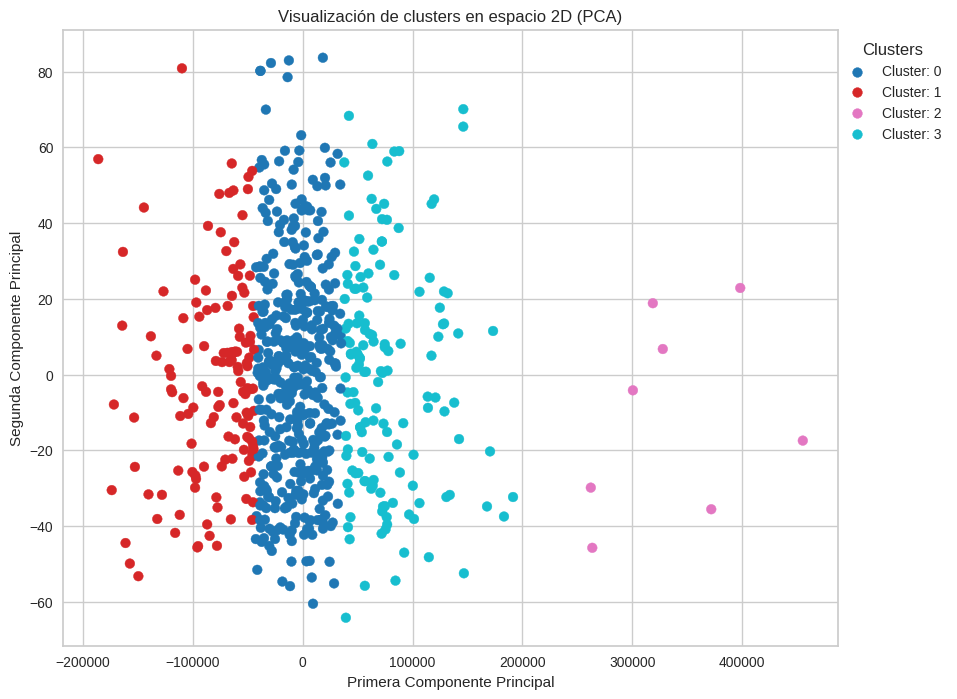

In [32]:
plt.figure(figsize=(10, 8))

clusters = np.unique(music["cluster"])
pca = PCA(n_components=2)
pca_result = pca.fit_transform(featuress)

scatter = plt.scatter(pca_result[:, 0], pca_result[:, 1], c = music["cluster"], cmap = "tab10")
colors = plt.cm.tab10(clusters / np.max(clusters))

for i, cluster in enumerate(clusters):
    plt.scatter([], [], color=colors[i], label=f"Cluster: {cluster}")


plt.title("Visualización de clusters en espacio 2D (PCA)")
plt.xlabel("Primera Componente Principal")
plt.ylabel("Segunda Componente Principal")

plt.legend(title="Clusters", bbox_to_anchor=(1.15, 1))

plt.show()